# Hypothesis Test

In [2]:
import pandas as pd
import numpy as np

def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)

def clean_housing(df):
    return(df
           .assign(**df.select_dtypes('string').replace('','Missing').astype('category'),
                   **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper = df['Year Built'].max())})
           .pipe(shrink_ints))

data = 'ames-housing-dataset.zip'
raw = pd.read_csv(data)
housing = clean_housing(raw)

In [4]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Exploring Data

Goals:
* Explore summary statistics by group

In [14]:
from scipy import stats
housing.Neighborhood.value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [32]:
(housing
 .groupby('Neighborhood')
 #.value_counts()
 .describe())

Order                                                     \
              count         mean          std     min      25%     50%   
Neighborhood                                                             
Blmngtn        28.0  1500.000000   882.971205    53.0   473.75  1742.5   
Blueste        10.0  1187.800000   687.000210   299.0   933.25   935.5   
BrDale         30.0  1317.933333   852.662076    30.0   407.25  1045.5   
BrkSide       108.0  1465.037037   778.979802   130.0   742.75  1343.5   
ClearCr        44.0  1551.681818   895.214610   209.0   785.25  1405.0   
CollgCr       267.0  1683.273408   811.009037   250.0   867.50  1477.0   
Crawfor       103.0  1810.679612   778.304759   294.0   938.50  2199.0   
Edwards       194.0  1627.675258   852.935427   235.0   889.25  1502.5   
Gilbert       165.0  1285.254545   815.923617     5.0   479.00  1616.0   
Greens          8.0  1591.375000  1131.304170   107.0   459.00  2188.5   
GrnHill         2.0  2575.000000   449.719913  2257.0  2416.00  2575.0   
IDOTRR         93.0  1737.784946   798.086201   206.0  1361.00  1559.0   
Landmrk         1.0  2789.000000          NaN  2789.0  2789.00  2789.0   
MeadowV        37.0  1779.243243   959.225452   327.0   978.00  1601.0   
Mitchel       114.0  1707.078947   884.002664   310.0   972.25  1604.5   
NAmes         443.0  1396.733634   847.035881     1.0   636.50  1266.0   
NPkVill        23.0   851.826087   790.536967    33.0   410.50   416.0   
NWAmes        131.0  1245.251908   775.591252    20.0   583.50  1188.0   
NoRidge        71.0  1337.154930   850.279595    60.0   502.50  1158.0   
NridgHt       166.0  1226.819277   789.816490    37.0   447.25  1073.5   
OldTown       239.0  1454.271967   832.683117   159.0   709.50  1314.0   
SWISU          48.0  1496.583333   962.873046   212.0   906.75  1518.5   
Sawyer        151.0  1543.794702   877.468262    84.0   772.50  1398.0   
SawyerW       125.0  1218.232000   807.823701    73.0   547.00  1135.0   
Somerst       182.0  1284.609890   780.019717    23.0   527.25  1168.5   
StoneBr        51.0  1326.568627   839.230392     7.0   368.50  1632.0   
Timber         72.0  1721.347222   801.830901   315.0   965.75  1584.5   
Veenker        24.0  1552.291667   636.580913   564.0  1179.75  1828.5   

                                 PID                ...  Yr Sold          \
                  75%     max  count          mean  ...      75%     max   
Neighborhood                                        ...                    
Blmngtn       2423.25  2430.0   28.0  5.282284e+08  ...  2009.00  2010.0   
Blueste       1543.75  2228.0   10.0  9.094523e+08  ...  2009.00  2010.0   
BrDale        2365.75  2373.0   30.0  5.274509e+08  ...  2009.00  2010.0   
BrkSide       2017.25  2688.0  108.0  8.486135e+08  ...  2009.00  2010.0   
ClearCr       2118.25  2768.0   44.0  9.054844e+08  ...  2009.00  2010.0   
CollgCr       2160.50  2816.0  267.0  9.070853e+08  ...  2009.00  2010.0   
Crawfor       2226.00  2885.0  103.0  9.095240e+08  ...  2009.00  2010.0   
Edwards       2188.75  2845.0  194.0  9.071216e+08  ...  2009.00  2010.0   
Gilbert       1757.00  2442.0  165.0  5.277561e+08  ...  2009.00  2010.0   
Greens        2520.25  2522.0    8.0  5.332531e+08  ...  2009.25  2010.0   
GrnHill       2734.00  2893.0    2.0  9.162527e+08  ...  2006.75  2007.0   
IDOTRR        2242.00  2883.0   93.0  9.086032e+08  ...  2008.00  2010.0   
Landmrk       2789.00  2789.0    1.0  9.072302e+08  ...  2006.00  2006.0   
MeadowV       2909.00  2921.0   37.0  9.232268e+08  ...  2009.00  2010.0   
Mitchel       2299.75  2930.0  114.0  9.206062e+08  ...  2009.00  2010.0   
NAmes         1961.50  2635.0  443.0  5.338416e+08  ...  2009.00  2010.0   
NPkVill       1365.00  2378.0   23.0  5.274536e+08  ...  2009.00  2010.0   
NWAmes        1866.50  2541.0  131.0  5.303630e+08  ...  2009.00  2010.0   
NoRidge       1833.50  2504.0   71.0  5.292254e+08  ...  2009.00  2010.0   
NridgHt       1717.75  2410.0  166.0  5.281454e

In [40]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['NAmes','CollgCr'], ['SalePrice']]
)

SalePrice                                                   \
                 count           mean           std       min       25%   
Neighborhood                                                              
NAmes            443.0  145097.349887  31882.707229   68000.0  127000.0   
CollgCr          267.0  201803.434457  54187.843749  110000.0  160875.0   

                                            
                   50%       75%       max  
Neighborhood                                
NAmes         140000.0  157500.0  345000.0  
CollgCr       200000.0  228250.0  475000.0

In [42]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['NAmes','CollgCr'], ['SalePrice']]
 .T
)

Neighborhood             NAmes        CollgCr
SalePrice count     443.000000     267.000000
          mean   145097.349887  201803.434457
          std     31882.707229   54187.843749
          min     68000.000000  110000.000000
          25%    127000.000000  160875.000000
          50%    140000.000000  200000.000000
          75%    157500.000000  228250.000000
          max    345000.000000  475000.000000

The summary statistics reveal the differences between the two neighborhoods: 
- College Creek has 267 entries and a mean sales price of around 200,000.
- North Ames has a mean sales price around 145,000.
- Not only are the means different, but the medians, maximums, and minimums also show differences, suggesting that the two neighborhoods have distinct real estate markets.

# Visualizing Distributions

Goals

* Make histograms of both distributions
* Make a cumulative distribution plot

In [58]:
names = (housing
         .query('Neighborhood == "NAmes"')
         .SalePrice)

college_cr = (housing
         .query('Neighborhood == "CollgCr"')
         .SalePrice)

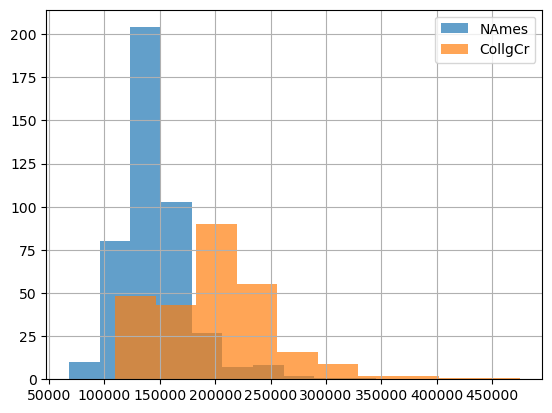

In [80]:
alpha =.7

ax = names.hist(label = 'NAmes', alpha=alpha)
college_cr.hist(ax=ax, label = 'CollgCr', alpha=alpha)
ax.legend()

The two distributions appear to be different. This observation aligns with the summary statistics analyzed earlier, which indicated that the neighborhoods have different sales price distributions.

In [83]:
# Cumulative Distribution Function (CDF) 

<Axes: xlabel='SalePrice'>

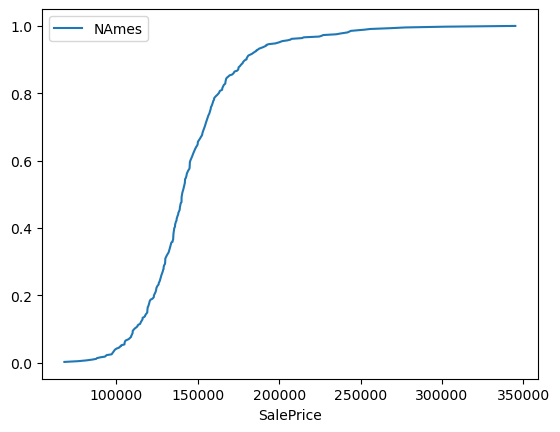

In [97]:
(names
 .to_frame()
 .assign(cdf = names.rank(method ='average',pct = True))
 .sort_values('SalePrice')
 .plot(x = 'SalePrice', y = 'cdf', label = 'NAmes')
)

Here, we have created a new column called "cdf" by ranking the values in the Series (in this case, SalePrice) using `.rank()`

`method='average'` handles ties by assigning them the average of the ranks they would have gotten. For example, if two values are tied for 2nd and 3rd place, both will get rank 2.5.

`pct=True` converts those ranks into percentile values instead of raw ranks. That means:
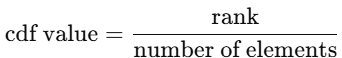
So the lowest sale price gets a value close to 0, and the highest gets a value of 1.


In [128]:
# ax=ax part inside the .plot() call is how pandas knows where to draw the plot if we're using subplots or layering multiple plots
# great for subplots or adding multiple plots to the same figure

without `ax`

249     245350
250     206000
251     198900
252     187000
256     159000
         ...  
2811    196500
2812    198000
2813    173900
2814    163990
2815    164990
Name: SalePrice, Length: 267, dtype: int64

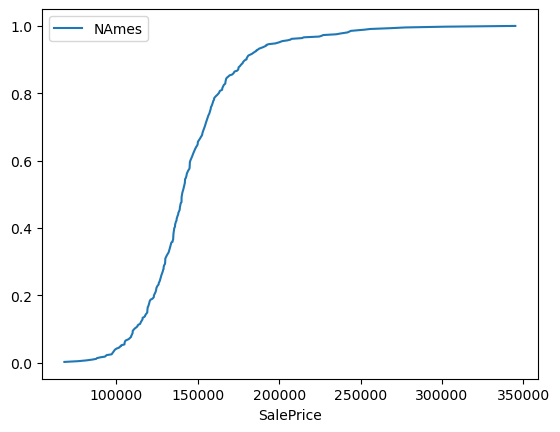

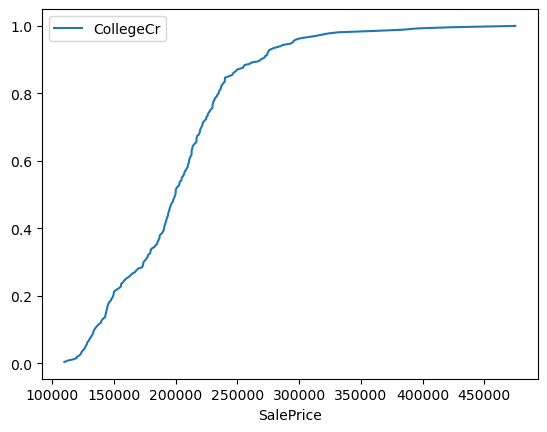

In [135]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
    
#fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(names, label='NAmes')
plot_cdf(college_cr, label='CollegeCr')

with `ax`

249     245350
250     206000
251     198900
252     187000
256     159000
         ...  
2811    196500
2812    198000
2813    173900
2814    163990
2815    164990
Name: SalePrice, Length: 267, dtype: int64

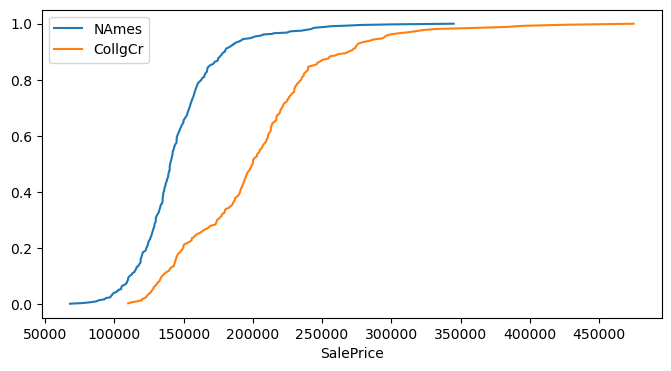

In [189]:
import matplotlib.pyplot as plt

def plot_cdf(ser, label='', ax=None):
    (ser
     .to_frame()
     .assign(cdf = ser.rank(method = 'average', pct = True))
     .sort_values('SalePrice')
     .plot(x = 'SalePrice', y = 'cdf', label = label, ax = ax)
    )
    return ser

fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(names, label='NAmes', ax=ax)
plot_cdf(college_cr, label = 'CollgCr', ax=ax)

after running the function, it’s clear that the CDFs do not overlap, further supporting the observation that the two neighborhoods have different distributions.

# Running Statistical Tests

Goals:

* Use the `scipy.stats` module to run a statistical test

- The scipy.stats module part of SciPy, a Python library that contains various utilities for numerical computation.
- The stats submodule includes a wide range of tools for running `statistical tests`, creating `probability distributions`, and even some `plotting capabilities`.

In [143]:
print(dir(stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ansari_swilk_statistics', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_bws_test', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sampling', '_sensitivity_analysis', '_sobol', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_su

Kolmogorov-Smirnov (KS) test 
- non-parametric test, meaning it does not assume any particular distribution for the data
- two-sample KS test, compare the distributions of two datasets

In [160]:
stats.ks_2samp?

Signature:
stats.ks_2samp(
    data1,
    data2,
    alternative='two-sided',
    method='auto',
    *,
    axis=0,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.

This test compares the underlying continuous distributions F(x) and G(x)
of two independent samples.  See Notes for a description of the available
null and alternative hypotheses.

Parameters
----------
data1, data2 : array_like, 1-Dimensional
    Two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the null and alternative hypotheses. Default is 'two-sided'.
    Please see explanations in the Notes below.
method : {'auto', 'exact', 'asymp'}, optional
    Defines the method used for calculating the p-value.
    The following options are available (default is 'auto'):
    
      * 'auto' : use 'exact' for smal

In [167]:
ks_statistics, p_value = stats.ks_2samp(names, college_cr)
print(stat, p_value)

0.5836609430085982 3.2892428354379855e-53


In [169]:
if p_value > 0.05:
    print('Fail to reject null hypothesis: Same distribution')
else:
    print('Reject null hypothesis: Not from the same distribution')

Reject null hypothesis: Not from the same distribution


# Testing for Normality

Goals:

* Use the `scipy.stats` module to test for normality
* Use the `scipy.stats` module to create a probability plot

Shapiro-Wilk test is a widely used statistical test to assess if a sample comes from a normal distribution

In [183]:
# Use the Shapiro-Wilks test
shapiro_stat, p_value =stats.shapiro(names)

print(shapiro_stat, p_value)

0.8932009892779424 5.124904026764063e-17


In [185]:
if p_value > 0.05:
    print("The distribution of the series is likely normal (fail to reject H0)")
else:
    print("The distribution of the series is likely not normal (reject H0)")


The distribution of the series is likely not normal (reject H0)


`probplot`
- Red Line: Represents the theoretical normal distribution
- Blue Dots: Represent the data points
- If the blue dots follow the red line closely, the data is normal
- Deviations from the line suggest non-normality.

In [218]:
stats.probplot?

Signature:
stats.probplot(
    x,
    sparams=(),
    dist='norm',
    fit=True,
    plot=None,
    rvalue=False,
)
Docstring:
Calculate quantiles for a probability plot, and optionally show the plot.

Generates a probability plot of sample data against the quantiles of a
specified theoretical distribution (the normal distribution by default).
`probplot` optionally calculates a best-fit line for the data and plots the
results using Matplotlib or a given plot function.

Parameters
----------
x : array_like
    Sample/response data from which `probplot` creates the plot.
sparams : tuple, optional
    Distribution-specific shape parameters (shape parameters plus location
    and scale).
dist : str or stats.distributions instance, optional
    Distribution or distribution function name. The default is 'norm' for a
    normal probability plot.  Objects that look enough like a
    stats.distributions instance (i.e. they have a ``ppf`` method) are also
    accepted.
fit : bool, optional
    F

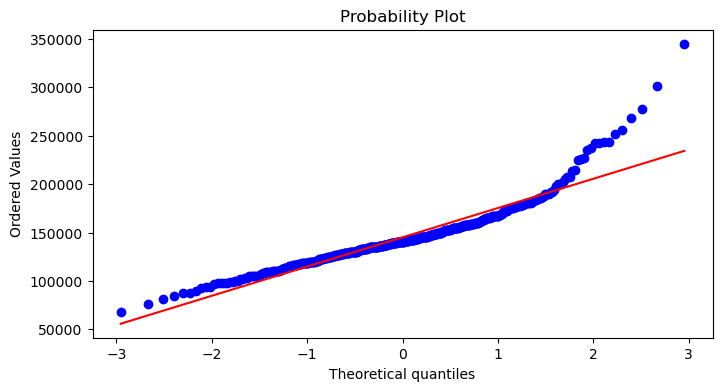

In [198]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ =stats.probplot(names, plot=ax)

For North Ames (`NAmes`):
- The probability plot shows that the data is close to normal on the left side, but the right tail deviates, suggesting non-normality.
- The histogram of North Ames shows a right tail or skew, which aligns with the deviation in the probability plot.

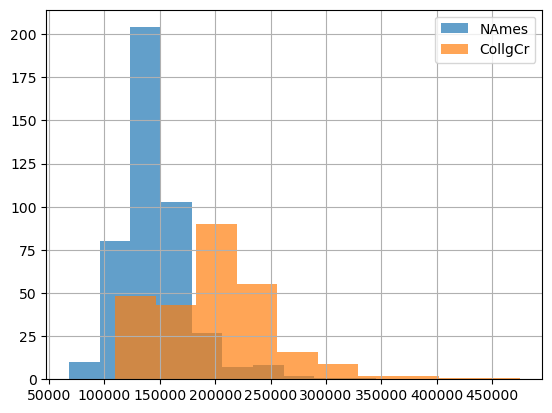

In [202]:
alpha = .7

ax = names.hist(label='NAmes', alpha=alpha)
college_cr.hist(label='CollgCr', alpha=alpha, ax=ax)
ax.legend()

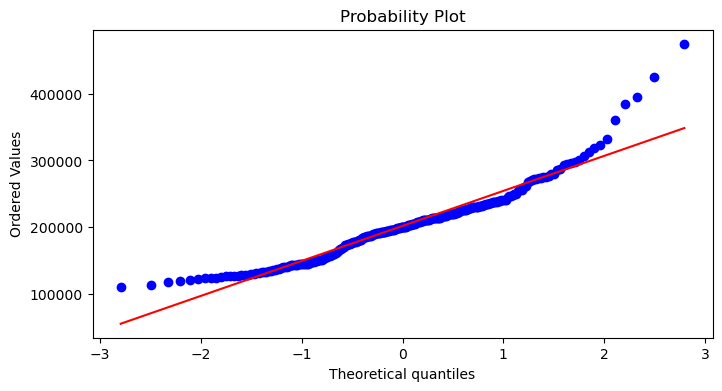

In [216]:
fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(college_cr, plot=ax)

For College Creek (`CollgCr`):
- The probability plot indicates that the data is not normal.
- The plot shows significant deviation on both the left and right tails, confirming that College Creek’s distribution is also non-normal.

# Task: Checking Square Footage Distributions
* Is the distribution of *1st Flr SF* from *NAmes* and *CollgCr* the same?

In [239]:
names_sf = (housing
            .query('Neighborhood == "NAmes"')
            .loc[:,'1st Flr SF']
           )

college_cr_sf = (housing
            .query('Neighborhood == "CollgCr"')
            .loc[:,'1st Flr SF']
           )

<Axes: >

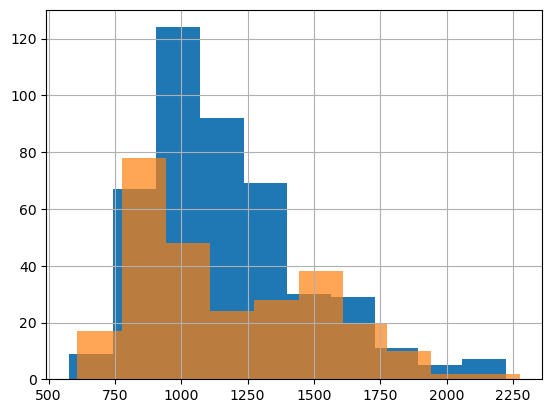

In [235]:
ax = names_sf.hist()
college_cr_sf.hist(ax=ax, alpha =.7)

In [243]:
# Kolmogorov-Smirnov test to two samples
ks, p_value = stats.ks_2samp(names_sf, college_cr_sf)

print(shapiro_stat, p_value)

0.9280898194327973 0.0007057410997705426


In [245]:
if p_value > 0.05:
    print('Fail to reject null hypothesis: Same distribution')
else:
    print('Reject null hypothesis: Not from the same distribution')

Reject null hypothesis: Not from the same distribution


In [247]:
# p_value less than 0.05, hence do not have same distribution